# Predicting Student Performance

Author: Nicholas Le
<br>
<br>
Course Project, UC Irvine, Math 10, Fall 24
<br>
<br>
I would like to post my notebook on the course's website. [Yes]

## Introduction

In this project I'll be analyzing a data set containing a student's test performance in math, reading, and writing, as well as their demographics. We will see if their demographics are correlated to their test scores and if we can use that data to predict their test performance. I'm most interested to see if a parent's level of education has an impact on their child's test performance.
<br>
Data set was taken from this link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

## Importing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Visualization

In [8]:
data=pd.read_csv('StudentPerformance1.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


No data is missing, so we don't need to clean. However, we won't be considering the students' gender and race in our analysis.

In [10]:
data = data.drop(columns=['gender', 'race/ethnicity'])

In [11]:
data

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,bachelor's degree,standard,none,72,72,74
1,some college,standard,completed,69,90,88
2,master's degree,standard,none,90,95,93
3,associate's degree,free/reduced,none,47,57,44
4,some college,standard,none,76,78,75
...,...,...,...,...,...,...
995,master's degree,standard,completed,88,99,95
996,high school,free/reduced,none,62,55,55
997,high school,free/reduced,completed,59,71,65
998,some college,standard,completed,68,78,77


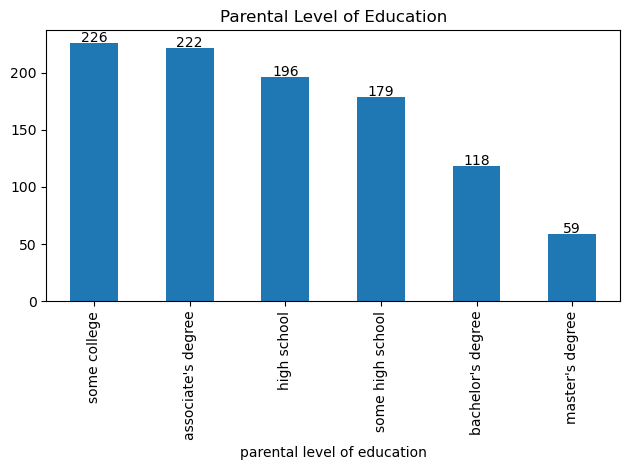

In [12]:
education_count=data['parental level of education'].value_counts() # count the quantities for each parental level of education
education_count.plot(kind='bar')
plt.title("Parental Level of Education")
for i, v in enumerate(education_count):
    plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()

We see from this bar graph that the most common level of education among parents at this school is some college or an associate's degree, while the least common is a master's degree.

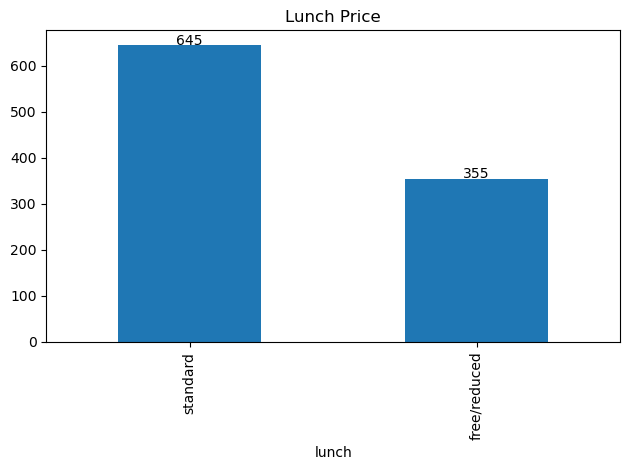

In [14]:
lunch_count=data['lunch'].value_counts() # count the quantities for each parental level of education
lunch_count.plot(kind='bar')
plt.title("Lunch Price")
for i, v in enumerate(lunch_count):
    plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()

We see here that most students pay the standard price for lunch.

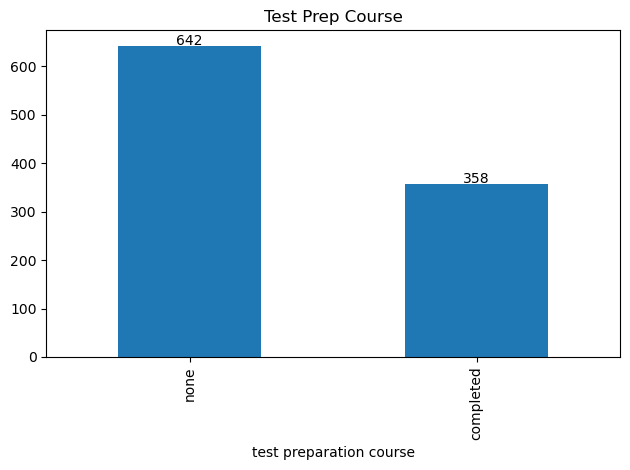

In [16]:
prep_count=data['test preparation course'].value_counts() # count the quantities for each parental level of education
prep_count.plot(kind='bar')
plt.title("Test Prep Course")
for i, v in enumerate(prep_count):
    plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()

We see here that most students did not complete a test preparation course prior to their exam.

## Correlation

Before we test the correlation, we'll first enumerate some of the strings in the columns for the parental education, lunch, and prep course columns to make them easier to work with.

In [20]:
numerated_education=[]
i=0 # use this loop to numerate the parental level of education
while i < len(data['parental level of education'])-1:
    if data.loc[i, 'parental level of education']=='some high school':
        numerated_education.append(0)
        i=i+1
    if data.loc[i, 'parental level of education']=='high school':
        numerated_education.append(1)
        i=i+1
    if data.loc[i, 'parental level of education']=='some college':
        numerated_education.append(2)
        i=i+1
    if data.loc[i, 'parental level of education']=="associate's degree":
        numerated_education.append(3)
        i=i+1
    if data.loc[i, 'parental level of education']=="bachelor's degree":
        numerated_education.append(4)
        i=i+1
    if data.loc[i, 'parental level of education']=="master's degree":
        numerated_education.append(5)
        i=i+1

In [21]:
print(len(numerated_education)) #check if all values went through the loop, should be 1000.

999


In [22]:
# missing the last value, so must add it manually
if data.loc[999, 'parental level of education']=='some high school':
    numerated_education.append(0)
if data.loc[999, 'parental level of education']=='high school':
    numerated_education.append(1)
if data.loc[999, 'parental level of education']=='some college':
    numerated_education.append(2)
if data.loc[999, 'parental level of education']=="associate's degree":
    numerated_education.append(3)
if data.loc[999, 'parental level of education']=="bachelor's degree":
    numerated_education.append(4)
if data.loc[999, 'parental level of education']=="master's degree":
    numerated_education.append(5)

print(len(numerated_education))
print(numerated_education)

1000
[4, 2, 5, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 2, 5, 0, 1, 0, 5, 3, 1, 2, 2, 0, 4, 5, 2, 4, 1, 5, 2, 2, 5, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 2, 3, 2, 1, 0, 1, 3, 3, 2, 0, 4, 0, 3, 3, 0, 0, 0, 2, 3, 3, 2, 2, 3, 0, 0, 3, 0, 4, 0, 5, 3, 1, 2, 3, 1, 2, 2, 3, 2, 0, 4, 1, 1, 3, 2, 3, 0, 2, 2, 4, 2, 4, 3, 1, 2, 2, 5, 3, 3, 0, 3, 1, 3, 2, 4, 1, 4, 4, 0, 2, 4, 3, 2, 1, 2, 1, 0, 2, 5, 4, 5, 0, 2, 2, 4, 4, 0, 1, 3, 2, 0, 2, 2, 1, 2, 2, 0, 3, 4, 3, 0, 4, 3, 4, 0, 2, 1, 2, 3, 3, 3, 2, 5, 1, 5, 4, 1, 5, 1, 2, 1, 0, 2, 3, 4, 5, 1, 3, 5, 0, 5, 2, 1, 3, 0, 3, 1, 0, 0, 4, 3, 2, 0, 2, 5, 3, 0, 1, 2, 4, 3, 2, 3, 3, 2, 0, 4, 1, 2, 2, 0, 2, 1, 3, 1, 0, 3, 1, 1, 0, 1, 3, 0, 0, 3, 5, 2, 1, 0, 2, 2, 3, 4, 0, 4, 3, 4, 0, 2, 3, 1, 4, 1, 2, 0, 3, 3, 1, 1, 1, 0, 2, 0, 5, 1, 2, 3, 3, 2, 5, 0, 2, 0, 1, 1, 0, 4, 1, 3, 2, 4, 2, 3, 2, 2, 4, 0, 1, 0, 4, 1, 1, 4, 2, 0, 3, 3, 0, 4, 0, 3, 0, 0, 4, 1, 3, 0, 3, 1, 3, 2, 0, 3, 3, 3, 2, 2, 0, 3, 1, 3, 4, 4, 3, 4, 1, 5, 3, 4, 3, 1, 1, 2, 0, 1, 2, 2, 2, 3, 0, 1, 3

In [23]:
numerated_lunch=[]
j=0 # use this loop to numerate the lunch price
while j < len(data['lunch'])-1:
    if data.loc[j, 'lunch']=='free/reduced':
        numerated_lunch.append(0)
        j=j+1
    if data.loc[j, 'lunch']=='standard':
        numerated_lunch.append(1)
        j=j+1

In [24]:
print(len(numerated_lunch)) #check length

999


In [25]:
#missing the last value, so must add it manually

if data.loc[999, 'lunch']=='free/reduced':
    numerated_lunch.append(0)
if data.loc[999, 'lunch']=='standard':
    numerated_lunch.append(1)

print(len(numerated_lunch))
print(numerated_lunch)

1000
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1

In [26]:
numerated_prep=[]
k=0 # use this loop to numerate whether the student completed a test preparation course
while k < len(data['test preparation course'])-1:
    if data.loc[k, 'test preparation course']=='none':
        numerated_prep.append(0)
        k=k+1
    if data.loc[k, 'test preparation course']=='completed':
        numerated_prep.append(1)
        k=k+1

In [27]:
print(len(numerated_prep)) #check length

999


In [28]:
#missing the last value, so must add it manually

if data.loc[999, 'test preparation course']=='none':
    numerated_prep.append(0)
if data.loc[999, 'test preparation course']=='completed':
    numerated_prep.append(1)

print(len(numerated_prep))
print(numerated_prep)

1000
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0

Now we'll replace the columns of strings in the dataframe with the new numerated data.

In [30]:
numerated_data=data.drop(columns=['parental level of education', 'lunch', 'test preparation course'])

In [31]:
numerated_data['parental level of education']=numerated_education
numerated_data

,math score,reading score,writing score,parental level of education
0,72,72,74,4
1,69,90,88,2
2,90,95,93,5
3,47,57,44,3
4,76,78,75,2
...,...,...,...,...
995,88,99,95,5
996,62,55,55,1
997,59,71,65,1
998,68,78,77,2


In [32]:
numerated_data['lunch']=numerated_lunch
numerated_data['test preparation course']=numerated_prep
numerated_data

,math score,reading score,writing score,parental level of education,lunch,test preparation course
0,72,72,74,4,1,0
1,69,90,88,2,1,1
2,90,95,93,5,1,0
3,47,57,44,3,0,0
4,76,78,75,2,1,0
...,...,...,...,...,...,...
995,88,99,95,5,1,1
996,62,55,55,1,0,0
997,59,71,65,1,0,1
998,68,78,77,2,1,1


In [33]:
numerated_data=numerated_data[['parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]
#re arrange columns
numerated_data

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,4,1,0,72,72,74
1,2,1,1,69,90,88
2,5,1,0,90,95,93
3,3,0,0,47,57,44
4,2,1,0,76,78,75
...,...,...,...,...,...,...
995,5,1,1,88,99,95
996,1,0,0,62,55,55
997,1,0,1,59,71,65
998,2,1,1,68,78,77


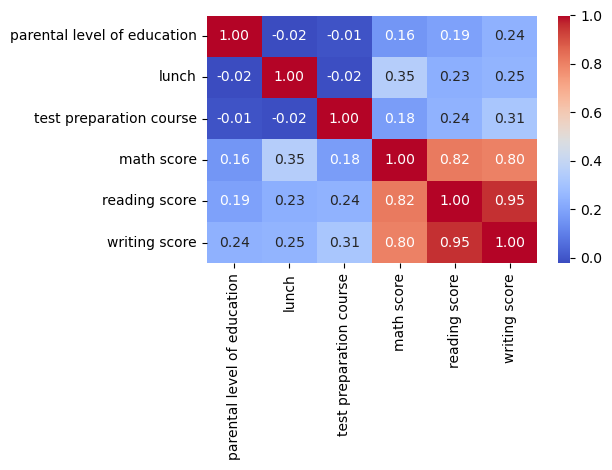

In [34]:
correlation_matrix=numerated_data.corr() #correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True) #heatmap
plt.tight_layout()
plt.show()

From this correlation matrix we can see that a student's performance in math, reading, and writing has a low correlation with their parental level of education, their lunch price, and whether they completed a test preparation course. However, a student's performance in a subject is highly correlated with their performance in the other two. We will then try a linear regression model to see if we can predict a student's subject scores based on another subject.

## Regression

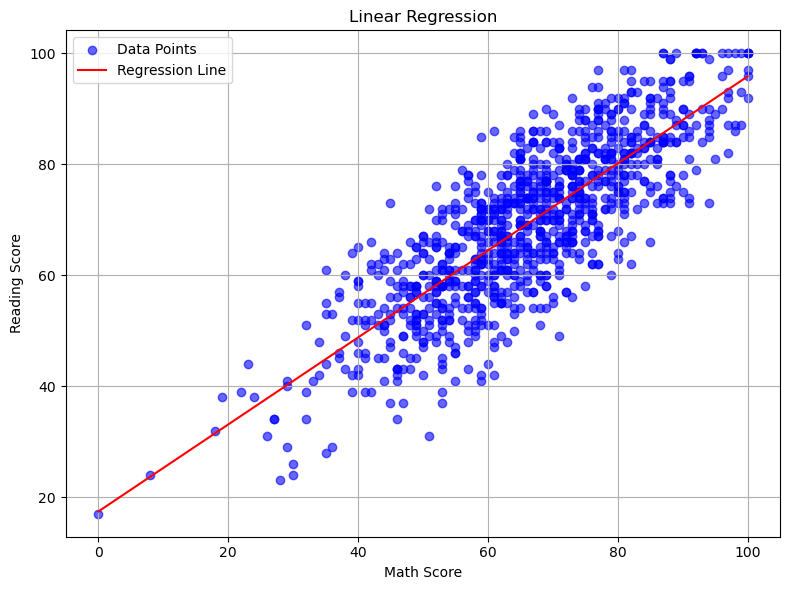

Train Score: 0.6639323148257752
Test Score: 0.6805592082513523
Score: 0.6684064227775539


In [37]:
#linear regression model for math and reading
X=data[['math score']]
Y=data['reading score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #split into training and testing sets
reg=LinearRegression()
reg.fit(X_train, Y_train)

X_sorted = pd.DataFrame(np.sort(X, axis=0), columns=['math score']) #graph the linear regression
Y_pred = reg.predict(X_sorted)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_sorted, Y_pred, color='red', label='Regression Line')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('Train Score: ' + str(reg.score(X_train, Y_train)))
print('Test Score: ' + str(reg.score(X_test, Y_test)))
print('Score: ' + str(reg.score(X, Y)))

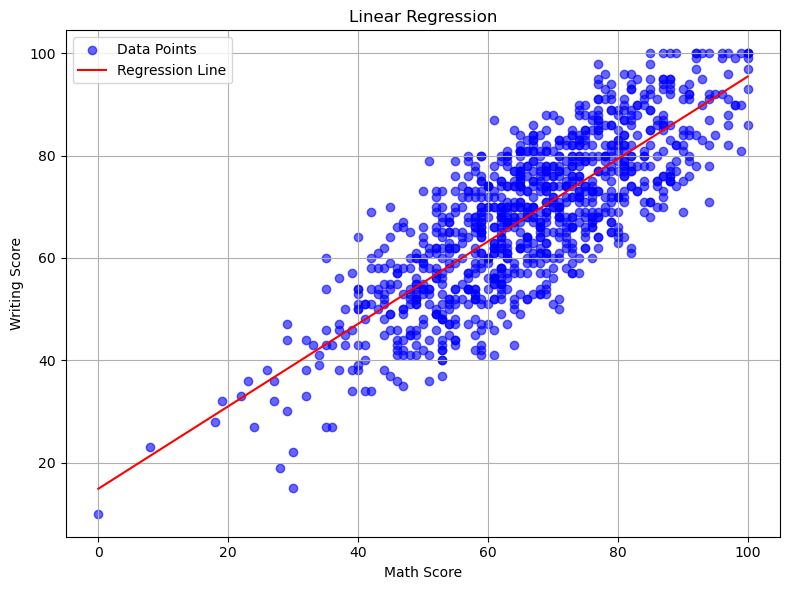

Train Score: 0.6438604598752549
Test Score: 0.6407452912595213
Score: 0.6442087346909648


In [38]:
#linear regression model for math and writing
X=data[['math score']]
Z=data['writing score']
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.2, random_state=42) #split into training and testing sets
reg=LinearRegression()
reg.fit(X_train, Z_train)

X_sorted = pd.DataFrame(np.sort(X, axis=0), columns=['math score']) #graph the linear regression
Z_pred = reg.predict(X_sorted)
plt.figure(figsize=(8, 6))
plt.scatter(X, Z, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_sorted, Z_pred, color='red', label='Regression Line')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('Train Score: ' + str(reg.score(X_train, Z_train)))
print('Test Score: ' + str(reg.score(X_test, Z_test)))
print('Score: ' + str(reg.score(X, Z)))

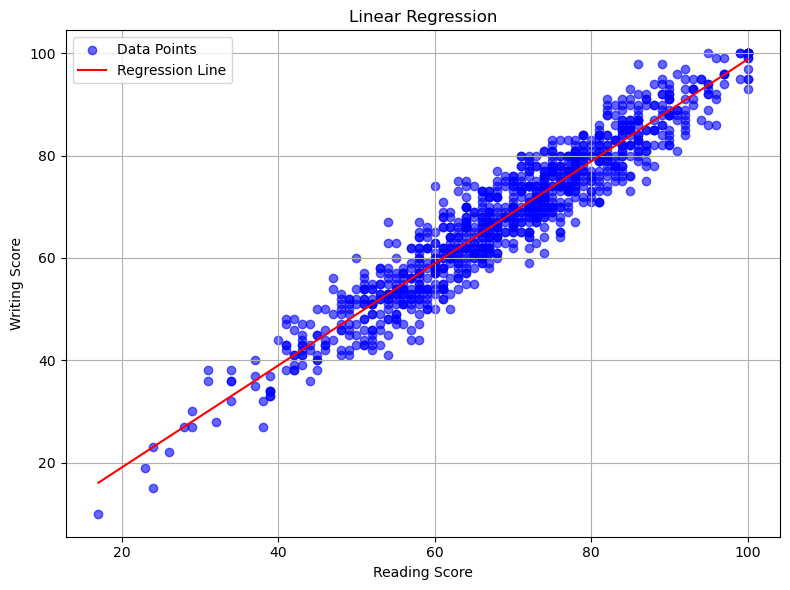

Train Score: 0.9136551535813879
Test Score: 0.9009597530871629
Score: 0.9112445228330772


In [39]:
#linear regression model for reading and writing
X=data[['reading score']]
A=data['writing score']
X_train, X_test, A_train, A_test = train_test_split(X, A, test_size=0.2, random_state=42) #split into training and testing sets
reg=LinearRegression()
reg.fit(X_train, A_train)

X_sorted = pd.DataFrame(np.sort(X, axis=0), columns=['reading score']) #graph the linear regression
A_pred = reg.predict(X_sorted)
plt.figure(figsize=(8, 6))
plt.scatter(X, A, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_sorted, A_pred, color='red', label='Regression Line')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('Train Score: ' + str(reg.score(X_train, A_train)))
print('Test Score: ' + str(reg.score(X_test, A_test)))
print('Score: ' + str(reg.score(X, A)))

We will use 0.70 as a benchmark for a good predictive model. Based on the scores of the three different models, only the reading and writing predictive model satisfies our benchmark.
<br>
Looking at the graphs of each Linear Regression, we see the relationship for math/reading and math/writing still trend upward, but there's more variation. Whereas with the reading/writing relationship the points on the scatter plot are more densely packed.

## Summary

In this project, I analyzed various variables, such as parental education level, lunch price, and test prep course completion, to see if those variables had an impact on a student's performance in math, reading, or writing. Prior to beginning, I was especially interested in seeing if a parent's education level had an impact on their child's test performance. In the analysis we found that the external demographic factors had a very low correlation with test scores. However, the test subjects were correlated with each other, so if a student performed well in a subject, it was likely they'd also perform well in the others. 

## References

Dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download